# Data Analysis
## Class 25
### Features in the flight dataset
#### December 6th

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('flightsOct.csv')
airports = pd.read_csv('airports.csv')

In [3]:
origin = df.groupby('ORIGIN')

In [4]:
origin['TAXI_OUT'].median()

ORIGIN
ABE    11.0
ABI     8.0
ABQ    10.0
ABR    13.5
ABY    12.0
       ... 
VPS    13.0
WRG     5.0
XNA    12.0
YAK     6.0
YUM    13.0
Name: TAXI_OUT, Length: 306, dtype: float64

In [5]:
origin.agg(sum)

,YEAR,MONTH,DAY_OF_MONTH,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Unnamed: 23
ORIGIN,,,,,,,,,,,,,,,,,,,
ABE,481585,2390,3772,1208110,277472,275712.0,2240.0,2968.0,1867.0,316195,316284.0,1569.0,0.0,0.0,28923.0,28252.0,23417.0,142551.0,0.0
ABI,405015,2010,3223,663802,221706,213305.0,788.0,1771.0,1964.0,242276,230851.0,-1153.0,7.0,2.0,12530.0,10265.0,6609.0,31758.0,0.0
ABQ,3659240,18160,28890,3608210,2216945,2191001.0,10787.0,20998.0,13686.0,2552187,2537012.0,1272.0,7.0,4.0,222582.0,211941.0,177343.0,1325528.0,0.0
ABR,143065,710,1179,523213,74204,73725.0,106.0,1090.0,568.0,82341,81575.0,47.0,1.0,0.0,4897.0,4770.0,3112.0,18247.0,0.0
ABY,175305,870,1376,459777,98936,100130.0,754.0,1203.0,736.0,107189,106208.0,935.0,0.0,1.0,4773.0,4888.0,2965.0,12615.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPS,836225,4150,6567,1411384,500690,497156.0,1516.0,5938.0,4491.0,590875,582589.0,-301.0,4.0,4.0,42445.0,39548.0,29214.0,178072.0,0.0
WRG,124930,620,992,3999,84940,82868.0,508.0,441.0,230.0,87885,82843.0,421.0,2.0,2.0,1705.0,1639.0,987.0,3503.0,0.0
XNA,1896115,9410,14892,3819079,1169030,1164358.0,4182.0,12987.0,10433.0,1359448,1346456.0,1055.0,7.0,2.0,102058.0,98139.0,74807.0,504462.0,0.0


Filtra valores por grupos, regresando aquellos todos los valores que esten en los grupos que cumplen la condición

In [6]:
df.groupby('ORIGIN').filter(lambda sf: sf['TAXI_OUT'].median() < 15)

,YEAR,MONTH,DAY_OF_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,...,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Unnamed: 23
138,2015,10,1,AA,N425AA,5,OKC,DFW,700,657.0,...,757.0,-11.0,0.0,NaN,0.0,68.0,60.0,35.0,175.0,NaN
139,2015,10,2,AA,N4WMAA,5,OKC,DFW,700,653.0,...,752.0,-16.0,0.0,NaN,0.0,68.0,59.0,36.0,175.0,NaN
140,2015,10,3,AA,N4XXAA,5,OKC,DFW,700,658.0,...,758.0,-10.0,0.0,NaN,0.0,68.0,60.0,36.0,175.0,NaN
141,2015,10,4,AA,N4YNAA,5,OKC,DFW,700,658.0,...,805.0,-3.0,0.0,NaN,0.0,68.0,67.0,37.0,175.0,NaN
142,2015,10,5,AA,N564AA,5,OKC,DFW,740,730.0,...,823.0,-25.0,0.0,NaN,0.0,68.0,53.0,35.0,175.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486160,2015,10,31,WN,N7829B,1027,MCI,DAL,1555,1550.0,...,1720.0,0.0,0.0,NaN,0.0,85.0,90.0,78.0,460.0,NaN
486161,2015,10,31,WN,N473WN,3822,MCI,DAL,1345,1341.0,...,1512.0,2.0,0.0,NaN,0.0,85.0,91.0,80.0,460.0,NaN
486162,2015,10,31,WN,N704SW,4742,MCI,DAL,1700,1654.0,...,1836.0,11.0,0.0,NaN,0.0,85.0,102.0,76.0,460.0,NaN
486163,2015,10,31,WN,N795SW,4990,MCI,DCA,1100,1141.0,...,1452.0,27.0,0.0,NaN,0.0,145.0,131.0,104.0,949.0,NaN


In [7]:
df.pivot_table(
    index= 'ORIGIN',
    columns='DAY_OF_MONTH',
    values='TAXI_OUT',
    aggfunc= np.median
)

DAY_OF_MONTH,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
ORIGIN,,,,,,,,,,,,,,,,,,,,,
ABE,12.0,14.0,12.5,11.0,12.0,11.0,10.0,14.0,13.0,11.5,...,11.0,12.0,9.0,11.0,12.0,9.5,13.0,11.0,12.0,10.5
ABI,8.0,11.0,8.0,8.5,9.0,11.0,7.0,6.0,7.0,8.0,...,9.0,11.0,9.0,11.5,10.0,8.5,8.0,9.0,9.0,9.0
ABQ,10.0,10.0,10.0,10.5,10.0,11.0,11.0,10.0,11.0,11.0,...,11.0,10.0,10.0,11.5,10.0,11.5,10.0,10.0,12.0,10.0
ABR,15.5,21.5,8.5,18.0,14.0,10.5,9.0,10.0,11.5,12.5,...,26.0,11.0,13.0,11.0,20.0,13.0,17.0,10.0,26.5,24.5
ABY,13.0,15.0,10.5,16.0,20.0,18.0,13.0,12.0,17.0,15.5,...,26.0,11.0,8.5,12.0,16.0,18.0,13.0,15.0,18.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPS,15.0,16.5,15.0,15.0,15.0,14.0,15.0,13.0,11.0,12.0,...,13.5,15.5,12.0,12.0,12.5,12.0,13.0,15.0,12.0,13.0
WRG,6.0,5.5,5.5,6.5,4.0,6.5,10.5,12.0,3.5,4.0,...,10.0,9.5,4.5,9.5,8.0,9.0,5.0,5.0,5.0,4.0
XNA,12.0,13.0,11.5,11.0,11.0,11.0,12.0,14.0,13.5,11.0,...,13.5,15.0,10.0,12.0,12.0,15.0,13.0,11.0,13.0,13.0


In [8]:
df.pivot_table(
    index= 'ORIGIN',
    columns= 'DAY_OF_MONTH',
    values= ['TAXI_OUT', 'ARR_DELAY'],
    aggfunc= [np.median, np.sum]
)

median                                                        \
             ARR_DELAY                                                         
DAY_OF_MONTH        1     2     3     4     5     6     7     8     9     10   
ORIGIN                                                                         
ABE               -1.0  -3.0 -12.0   7.0  -1.0 -11.0  -3.0  -1.0   2.0 -12.5   
ABI              -19.0 -17.0 -24.0 -17.0 -20.0   4.0 -18.0 -16.0 -12.0   1.5   
ABQ               -8.0  -4.0  -8.0  -5.5  -7.0  -3.0  -6.5  -5.0  -1.5  -6.0   
ABR               -2.0  -0.5 -13.5   0.0 -14.5  -3.5  16.5  -7.0  -2.5   1.0   
ABY                4.0  26.0  -7.5  13.0   6.0   7.0  -6.0  -9.0  -3.0   0.5   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
VPS               -9.0  -6.0 -10.0  -4.5  -7.5 -10.0  -8.5 -12.0 -12.0  -7.0   
WRG              -12.5 -12.0  -9.0 -22.5  31.5  63.5  -2.0   9.5   2.0  -9.0   
XNA               -4.0   2.0  -6.5 -10.0  -5.0 -11.0  -9.0  -8.0  -6.0 -10.0   
YAK              -17.5 -15.5  32.5 -17.5  -9.5 -25.5  -1.5   2.5 -12.5  21.5   
YUM               -3.0 -14.5  -6.5  -7.0 -11.0  17.0   3.0  -6.0  -7.5  -3.0   

              ...      sum                                                   \
              ... TAXI_OUT                                                    
DAY_OF_MONTH  ...       22     23     24     25     26     27     28     29   
ORIGIN        ...                                                             
ABE           ...    104.0  121.0   39.0   71.0  112.0   84.0  101.0  104.0   
ABI           ...     51.0   34.0   55.0   78.0   63.0   54.0   59.0   65.0   
ABQ           ...    778.0  726.0  573.0  732.0  726.0  737.0  638.0  671.0   
ABR           ...     92.0   52.0   26.0   33.0   57.0   26.0   17.0   20.0   
ABY           ...     67.0   36.0   17.0   40.0   50.0   36.0   34.0   43.0   
...           ...      ...    ...    ...    ...    ...    ...    ...    ...   
VPS           ...    220.0  162.0  157.0  191.0  219.0  165.0  175.0  202.0   
WRG           ...     20.0   19.0    9.0   19.0   16.0   18.0   10.0   10.0   
XNA           ...    534.0  516.0  271.0  261.0  411.0  512.0  471.0  402.0   
YAK           ...      7.0   23.0    9.0    6.0    9.0   19.0   29.0    8.0   
YUM           ...     93.0   82.0   65.0   93.0  104.0  125.0   86.0  106.0   

                            
                            
DAY_OF_MONTH     30     31  
ORIGIN                      
ABE           108.0   42.0  
ABI            63.0   48.0  
ABQ           762.0  480.0  
ABR            53.0   49.0  
ABY            44.0   19.0  
...             ...    ...  
VPS           187.0  131.0  
WRG            10.0    8.0  
XNA           457.0  263.0  
YAK            19.0   13.0  
YUM           104.0   67.0  

[306 rows x 124 columns]

In [9]:
df.groupby(['ORIGIN'])['TAXI_OUT'].median()

ORIGIN
ABE    11.0
ABI     8.0
ABQ    10.0
ABR    13.5
ABY    12.0
       ... 
VPS    13.0
WRG     5.0
XNA    12.0
YAK     6.0
YUM    13.0
Name: TAXI_OUT, Length: 306, dtype: float64

In [10]:
df = pd.merge(left=df,
                right=df.groupby(['ORIGIN'])['TAXI_OUT'].median(),
                on='ORIGIN',
                suffixes=('', '_median')
                )
df

,YEAR,MONTH,DAY_OF_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,...,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Unnamed: 23,TAXI_OUT_median
0,2015,10,1,AA,N797AA,1,JFK,LAX,900,1001.0,...,51.0,0.0,NaN,0.0,370.0,360.0,324.0,2475.0,NaN,21.0
1,2015,10,2,AA,N788AA,1,JFK,LAX,900,855.0,...,-15.0,0.0,NaN,0.0,370.0,360.0,328.0,2475.0,NaN,21.0
2,2015,10,4,AA,N794AA,1,JFK,LAX,900,854.0,...,-16.0,0.0,NaN,0.0,370.0,360.0,322.0,2475.0,NaN,21.0
3,2015,10,5,AA,N798AA,1,JFK,LAX,900,859.0,...,-14.0,0.0,NaN,0.0,370.0,357.0,326.0,2475.0,NaN,21.0
4,2015,10,6,AA,N799AA,1,JFK,LAX,900,856.0,...,-32.0,0.0,NaN,0.0,370.0,342.0,316.0,2475.0,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486160,2015,10,31,WN,N413WN,4061,ISP,MCO,1350,1358.0,...,-9.0,0.0,NaN,0.0,165.0,148.0,133.0,971.0,NaN,8.0
486161,2015,10,31,WN,N7745A,4070,ISP,MCO,720,718.0,...,-18.0,0.0,NaN,0.0,165.0,149.0,131.0,971.0,NaN,8.0
486162,2015,10,31,WN,N926WN,3925,ISP,PBI,1605,1620.0,...,0.0,0.0,NaN,0.0,170.0,155.0,143.0,1052.0,NaN,8.0
486163,2015,10,31,WN,N413WN,4062,ISP,PBI,715,718.0,...,-17.0,0.0,NaN,0.0,170.0,150.0,135.0,1052.0,NaN,8.0


In [13]:
df.drop('Unnamed: 23', axis=1, inplace=True)

In [14]:
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'TAXI_OUT_median'],
      dtype='object')

<AxesSubplot: ylabel='Count'>

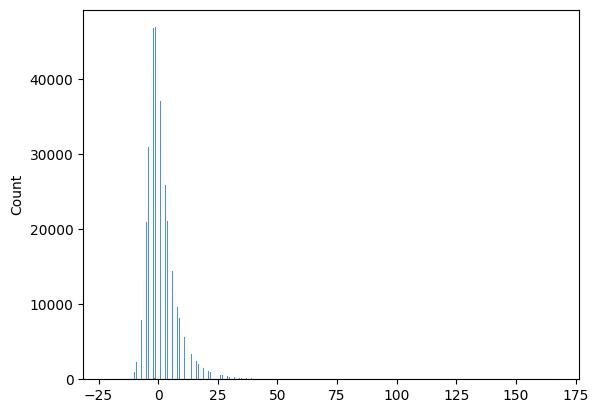

In [16]:
sns.histplot(df.TAXI_OUT-df.TAXI_OUT_median)

<AxesSubplot: xlabel='DISTANCE', ylabel='CRS_ELAPSED_TIME'>

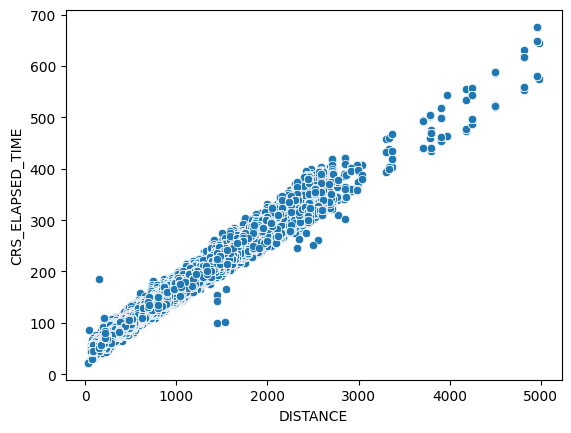

In [17]:
sns.scatterplot(x = 'DISTANCE',
                y = 'CRS_ELAPSED_TIME',
                data = df)

In [26]:
origin = df.groupby('ORIGIN')
bos = origin.get_group('BOS')

In [27]:
bos

,YEAR,MONTH,DAY_OF_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,...,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_OUT_median
146842,2015,10,1,AA,N3LHAA,40,BOS,ORD,1930,2125.0,...,2304.0,113.0,0.0,NaN,0.0,161.0,159.0,134.0,867.0,17.0
146843,2015,10,2,AA,N3LVAA,40,BOS,ORD,1930,1923.0,...,2109.0,-2.0,0.0,NaN,0.0,161.0,166.0,134.0,867.0,17.0
146844,2015,10,4,AA,N3MHAA,40,BOS,ORD,1930,2002.0,...,2141.0,30.0,0.0,NaN,0.0,161.0,159.0,124.0,867.0,17.0
146845,2015,10,5,AA,N3HYAA,40,BOS,ORD,1930,1941.0,...,2122.0,11.0,0.0,NaN,0.0,161.0,161.0,130.0,867.0,17.0
146846,2015,10,6,AA,N3MBAA,40,BOS,ORD,1930,1921.0,...,2104.0,-7.0,0.0,NaN,0.0,161.0,163.0,131.0,867.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157001,2015,10,31,WN,N7826B,244,BOS,MDW,620,629.0,...,810.0,-5.0,0.0,NaN,0.0,175.0,161.0,141.0,861.0,17.0
157002,2015,10,31,WN,N733SA,1613,BOS,MDW,800,754.0,...,936.0,-19.0,0.0,NaN,0.0,175.0,162.0,133.0,861.0,17.0
157003,2015,10,31,WN,N454WN,4903,BOS,MDW,1145,1144.0,...,1334.0,4.0,0.0,NaN,0.0,165.0,170.0,140.0,861.0,17.0
157004,2015,10,31,WN,N781WN,3134,BOS,MKE,1030,1028.0,...,1204.0,-6.0,0.0,NaN,0.0,160.0,156.0,135.0,860.0,17.0


<AxesSubplot: xlabel='DISTANCE', ylabel='CRS_ELAPSED_TIME'>

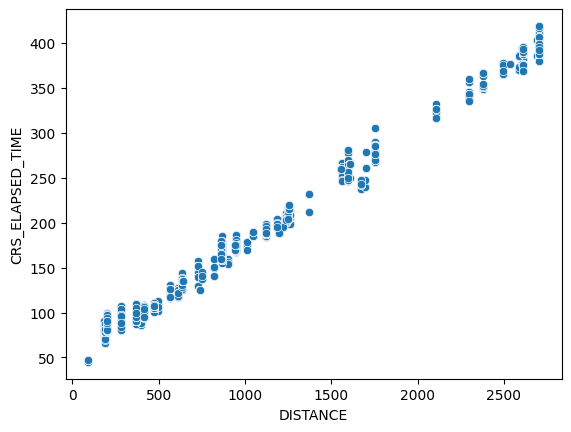

In [28]:
sns.scatterplot(x = 'DISTANCE',
                y = 'CRS_ELAPSED_TIME',
                data = bos)

<AxesSubplot: xlabel='DISTANCE', ylabel='CRS_ELAPSED_TIME'>

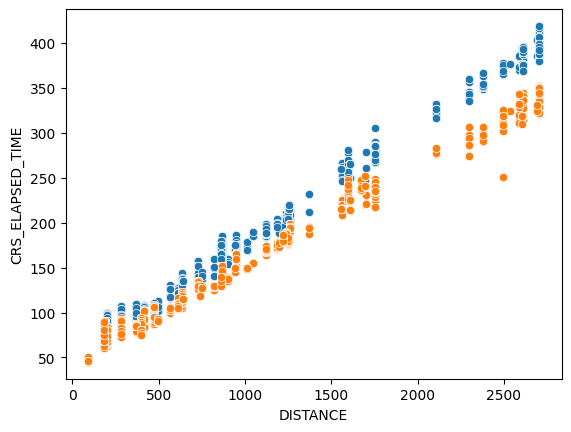

In [30]:
sns.scatterplot(x = 'DISTANCE',
                y = 'CRS_ELAPSED_TIME',
                data = df[df.ORIGIN=='BOS'])
sns.scatterplot(x = 'DISTANCE',
                y = 'CRS_ELAPSED_TIME',
                data = df[df.DEST=='BOS'])

In [31]:
x = bos.DISTANCE.values.reshape(-1, 1)
y = bos.CRS_ELAPSED_TIME.values.reshape(-1, 1)
basicModel = LinearRegression().fit(x, y)
basicModel.score(x, y)

0.993181780784797

* importar la base de airports
* obtener la lat y lon de bos
* obtener la lat y lon de todos los aeropuertos destinos que salen de bos

calcular:

* azimuth = np.arctan2((x2 - x1)/ (y2 - y1))
* np.sin(azimuth) en grados

* donde (x1, y1) = (lat_bos, lon_bos)
* (x2,y2) = (lat_des, lon_dest)

* un vuelo dirigiendose:
* de Norte/sur tiene un seno azimutal de 0 (0 grados)
* Al este tiene un seno azimutal de 1 (90 grados)
* al oeste tiene un seno azimutal de -1 (-90 grados o 270 grados)

hacer merge de las lat y lon de origen y destino para poder realizarlo de manera mas rapida

group by por origen 

Una vez agregado el atributo azimuth volver a ajustar el modelo lineal pero usando

In [ ]:
x = bos[['DISTANCE','sin_azimuth']].values.reshape(-1, 1) # sin azimuth significa seno del azimuth
y = bos.CRS_ELAPSED_TIME.values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
model.score(x, y)